In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("../Data/Advertising.csv")

df.drop("Unnamed: 0", axis=1, inplace=True) # Dropping unnamed 0


# EDA - Exploratory data analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [26]:
df.shape # 200 samples, 3 features, 1 label (label is sales)

(200, 4)

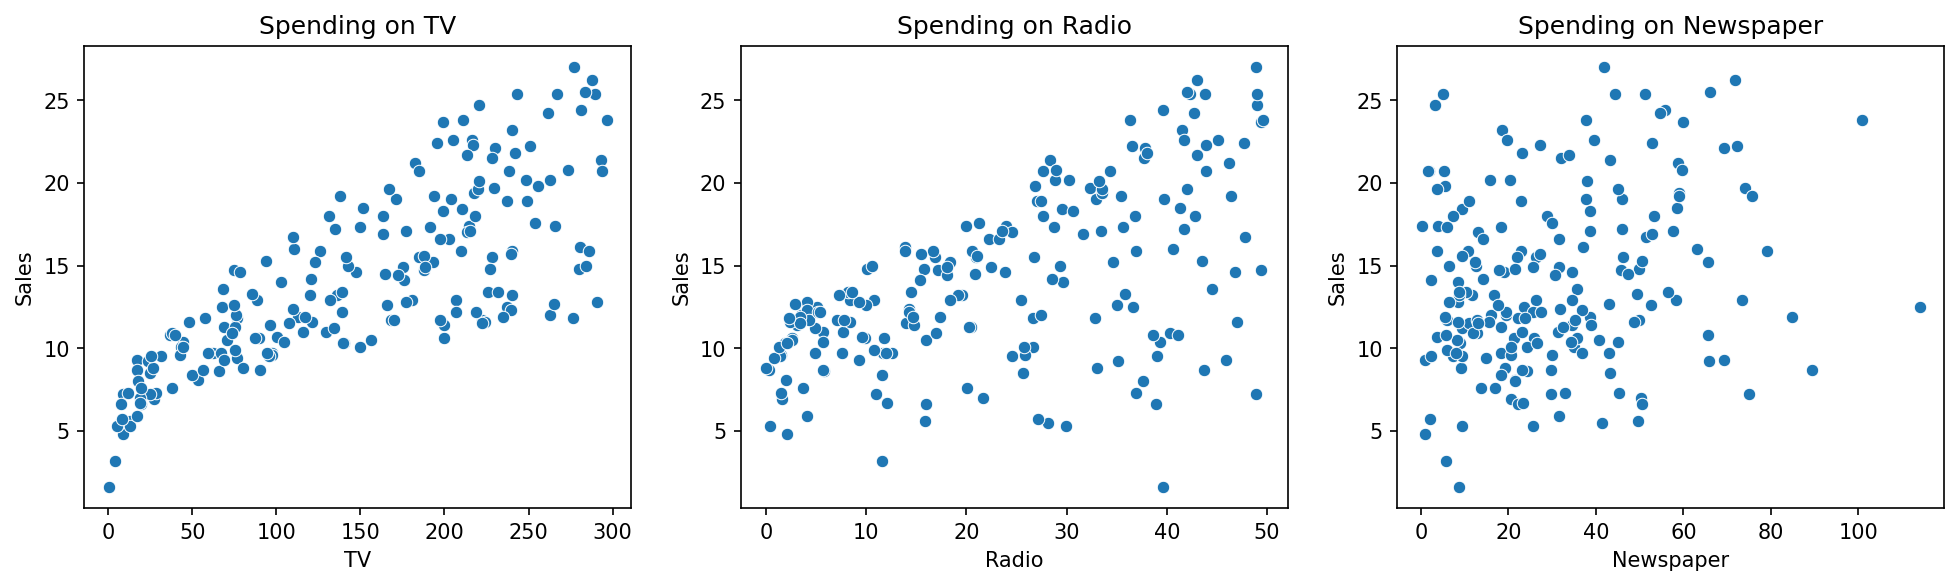

In [27]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize = (16,4),dpi = 150)

for i, feature in enumerate(df.columns[:-1]): # Enumerate simply assignes a value to every feature, No need to have a count variable.
    sns.scatterplot(data = df, x = feature, y ="Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

## Simple linear regression

In [28]:
X, y = df["TV"], df["Sales"]

print(X) # Series object.
print(y) # also a series object

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [29]:
beta_1, beta_0 = np.polyfit(X,y, deg=1) # Returns a vector of coefficients "p" that minimises the squared error.
# degree 1 = simple regression, degree >2 = multiple regression
# See polyfit as OLS

print(f"{beta_0 = }\n{beta_1 = }")

beta_0 = 7.032593549127696
beta_1 = 0.04753664043301972


[Text(0.5, 1.0, 'Regression line on TV advertisement spending')]

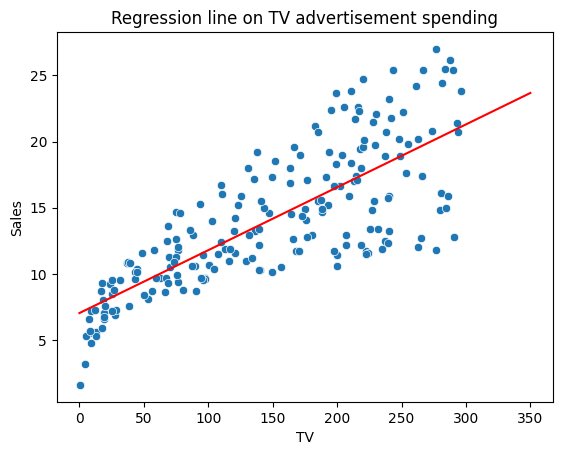

In [30]:
y_hat = lambda x: beta_0 + beta_1*x # function for calculating y_hat using beta0 and beta 1

spending = np.linspace(0, 350) # Returns evenly spaced number between the START value 0 and END value 350
# 350 is chosen because we know from plotting "TV" and "SALES" that they go up to 300


ax = sns. scatterplot(data = df, x= "TV", y = "Sales")
sns.lineplot(x = spending, y=y_hat(spending), color = "red") # line is based on beta_0 and beta_1
ax.set(title = "Regression line on TV advertisement spending")

<Axes: xlabel='TV', ylabel='Sales'>

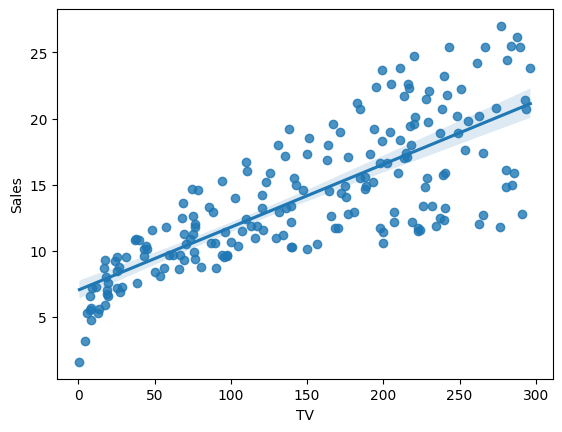

In [31]:
sns.regplot(x=X,y=y) # Easier way to do the same thing as above,
#shaded part for reg plot is the confidence interval

## Multiple linear regression

In [33]:
X, y = df.drop("Sales", axis=1), df["Sales"] # Dropping sales from the X, making y the sales column

X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [34]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [35]:
X.insert(0, "Intercept", 1) # Inserting a column of 1's at the start of the dataframe

In [39]:
# @ operator is called matmul, it is used for matrix multiplication
# in numpy - the matmul operator is overloaded to handle matrix multiplication
X.T@X
# For matrix multiplication to work, the number of columns in the first matrix must be equal to the number of rows in the second matrix.

,Intercept,TV,Radio,Newspaper
Intercept,200.0,29408.50,4652.80,6110.80
TV,29408.5,5791118.39,698061.98,919625.28
Radio,4652.8,698061.98,152107.86,164946.55
Newspaper,6110.8,919625.28,164946.55,281096.74


In [42]:
#Normal equation - OLS
beta_hat = np.linalg.inv(X.T@X)@X.T@y # Inverse of a matrix multiplied by the transpose of X 
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [44]:
regression_fit = lambda X, y: np.linalg.inv(X.T@X)@X.T@y # Function for calculating beta_hat
beta_hat = regression_fit(X,y)
beta_hat

0    2.938889
1    0.045765
2    0.188530
3   -0.001037
dtype: float64

In [52]:
predict = lambda x, beta: np.dot(x,beta) # Function for calculating y_hat

test_sample = [1, 230, 38, 69]
y_hat = predict(test_sample, beta_hat) # dot multiplication of the test sample and beta_hat

print(f"With $230k on TV, 38$ on radio and $69k on newspaper we get a sales prediction of {y_hat:.1f}k units")


With $230k on TV, 38$ on radio and $69k on newspaper we get a sales prediction of 20.6k units


## Train|test split

In [67]:
train_fraction = int(len(df)*0.7) # 70% of the data is used for training

train = df.sample(n = train_fraction, random_state=42, replace = False)
train

,TV,Radio,Newspaper,Sales
95,163.3,31.6,52.9,16.9
15,195.4,47.7,52.9,22.4
30,292.9,28.3,43.2,21.4
158,11.7,36.9,45.2,7.3
128,220.3,49.0,3.2,24.7
...,...,...,...,...
138,43.0,25.9,20.5,9.6
3,151.5,41.3,58.5,18.5
105,137.9,46.4,59.0,19.2
53,182.6,46.2,58.7,21.2


In [69]:
test = df.drop(train.index)
train.shape, test.shape, df.shape # Checking that the train and test sets equal to the full set

((140, 4), (60, 4), (200, 4))

In [75]:
X_train, y_train = train.drop("Sales", axis=1), train["Sales"] # splitting data into X train and y train
X_test, y_test = test.drop("Sales", axis=1), test["Sales"] # splitting data into X test and y test
X_train.insert(0, "Intercept", 1) # Inserting a column of 1's at the start of the dataframe
X_test.insert(0, "Intercept", 1) # Inserting a column of 1's at the start of the dataframe
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 4), (140,), (60, 4), (60,))

## Prediction
- now that we have split our data into x y train and x y test

In [84]:
beta_hat = regression_fit(X_train, y_train) # Calculating beta_hat using the training data
print(f"Beta parameters: \n{beta_hat}")

predict = lambda X, weights: X @ weights # Function for calculating y_hat
# Dimensional analysis,
beta_hat = np.reshape(beta_hat.to_numpy(), (4,1)) # Reshaping beta_hat to a column vector
y_hat = predict(X_test, beta_hat).to_numpy() # Calculating y_hat using the test data

y_hat[:5] # First 5 predictions

Beta parameters: 
0    2.956094
1    0.046793
2    0.187063
3   -0.004805
dtype: float64


array([[12.17324122],
       [12.19125728],
       [ 3.74653773],
       [ 8.90545078],
       [18.43980126]])

In [87]:
X_test.iloc[0] #These are the values for the first row of the test data
# spending $44.5k on TV, $39.3k on radio and $45.1k on newspaper gives us a prediction on 12.17k units

Intercept     1.0
TV           44.5
Radio        39.3
Newspaper    45.1
Name: 1, dtype: float64

## Evaluate model performance   


In [94]:
m = len(y_test) # Number of samples in the test set

# Remove extra dimension from (60,1) > (60,)
y_hat = np.reshape(y_hat, (m))

# Mean squared error
mean_absolute_error = 1/m*np.sum(np.abs(y_hat-y_test))
# y_hat is the predicted value, y_test is the actual value
mean_squared_error = 1/m*np.sum((y_hat-y_test)**2)
root_mean_squared_error = np.sqrt(mean_squared_error)

print(f"Mean absolute error: {mean_absolute_error:.2f}\nMean squared error: {mean_squared_error:.2f}\nRoot mean squared error: {root_mean_squared_error:.2f}")

Mean absolute error: 1.32
Mean squared error: 3.54
Root mean squared error: 1.88
